## Assignment 6A

### Problem 1 (50 points)
Laplace’s Equation in a Box.
An empty square box has conducting walls, $1\text{m}$ each. All of the walls are grounded at $0$ statvolts, except for the wall at the top, which is at voltage $V = 1$ statvolt (in the Gauss unit system $1$ statvolt
corresponds to $\approx 299.79$ volts in SI units).

Note: The small gaps between the top wall and the others in the figure indicates that they are insulated from one another, but you can assume that these gaps have negligible width in your calculation.

For the two-dimensional case, solve Laplace’s equation for the electrostatic potential $\phi$, subject to boundary conditions $\phi = V$ on the top wall and $\phi = 0$ on the other walls.


#### Problem 1.A
Write a program to compute the solution to the two-dimensional electrostatics problem using the Jacobi method.

Use the following parameters: The grid spacing $a = 1 \text{cm}$, so there are $100$ grid points on each side ($101$ if we count the points at both the beginning and the end).

In [7]:
import numpy as np

# Function to iterate the potential array
def iterate(potential) -> np.ndarray:
    new_potentials = potential.copy()
    N, M = potential.shape
    for i in range(1, N-1):
        for j in range(1, M-1):
            new_potentials[i, j] = (1+ω)*(potential[i-1, j] + potential[i+1, j] + potential[i, j-1] + potential[i, j+1])/4 - ω * potential[i, j]
    return new_potentials

# Problem Parameters
L  = 100         # cm, Length of the Rod
Δx = 1           # cm, Grid Spacing
N  = int(L/Δx)+1 # Number of Grid Points
ω  = 0.0         # Relaxation Parameter

# Create the potential array
box_potential = np.zeros((N, N))
box_potential[0,:] = 1  # Set the top to 1 statvolt (in SI units)

# Iterate the potential array steps
for i in range(1000):
    box_potential = iterate(box_potential)

#### Problem 1.B
Make a density plot of the result.

Hint: This program may take a while to run, so start with a sparse grid to ensure your program is functioning correctly. Once confirmed, use the tighter grid specified above.

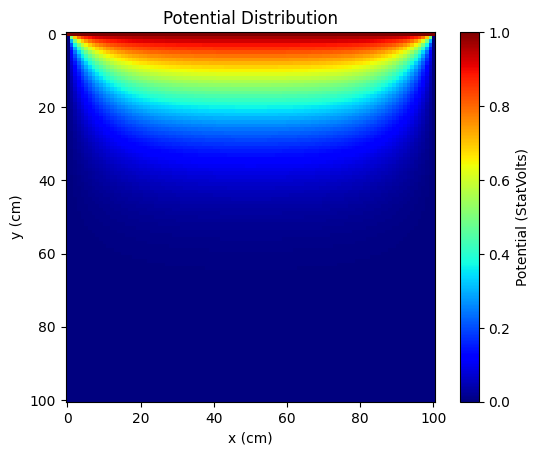

In [8]:
# Plot the potential array
import matplotlib.pyplot as plt
plt.imshow(box_potential, cmap='jet', interpolation='nearest')
plt.title('Potential Distribution')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
cbar = plt.colorbar()
cbar.set_label('Potential (StatVolts)')
plt.show()

### Problem 2 (50 points)
Two square charges are placed inside a square two-dimensional box. The potential is zero at the walls, and the charges are defined such that $4\pi\rho=+1$ and $4\pi\rho=-1$ (surface charge density in statcoulomb/$\text{cm}^2$, where 1 statcoulomb $\approx 3.33564\times10^{-10}$ coulombs in SI) at the locations of the positive and negative charges, respectively

#### Problem 2.A
Write a program, or modify the previous one, to solve Poisson’s equation using Jacobi’s method, in the presence of the charge density specified above.

Continue iterating until the solution for the electric potential changes by less than $10^{-6}$ statvolt per step at every grid point.

Note: In the Gauss system of units the Poisson’s equation is written as:
$$\vec\nabla^2\phi=-4\pi\rho$$

In [ ]:
import numpy as np

# Function to iterate the potential array
def iterate(potential, charge) -> np.ndarray:
    new_potentials = potential.copy()
    N, M = potential.shape
    for i in range(1, N-1):
        for j in range(1, M-1):
            new_potentials[i, j] = (1+ω)*(potential[i-1, j] + potential[i+1, j] + potential[i, j-1] + potential[i, j+1])/4 - ω * potential[i, j]
            new_potentials[i, j] += np.pi * Δx**2 * charge[i, j]
    return new_potentials

# Problem Parameters
L  = 100         # cm, Length of the Rod
Δx = 1           # cm, Grid Spacing
N  = int(L/Δx)+1 # Number of Grid Points
ω  = 0.0         # Relaxation Parameter

# Create the potential array
potential = np.zeros((N, N))

# Create the charge array
Q = 1
charge = np.zeros((N, N))
charge[20:39, 60:79] = +Q
charge[60:79, 20:39] = -Q

# Iterate the potential array steps
for i in range(2_000):
    potential = iterate(potential, charge)

#### Problem 2.B
Make a density plot of the result.

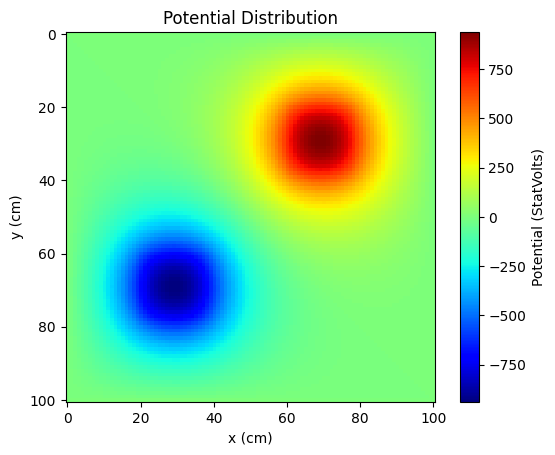

In [8]:
# Plot the potential array
import matplotlib.pyplot as plt
plt.imshow(potential, cmap='jet', interpolation='nearest')
plt.title('Potential Distribution')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
cbar = plt.colorbar()
cbar.set_label('Potential (StatVolts)')
plt.show()